##1. Setup

My dataset contains 100 original pen images that is annotated by myself and splitted into train and validation sets. 80 images were chosen for training and 20 images were chosen for evaluation. Then i preprocessed the images by auto-orienting and resizing to decrease training time and increase performance by applying image transformations to all images in this dataset. Then, i have used 3 image augmentation techniques(Flip, 90 degrees rotate and crop) to increase the size of the dataset also improve the overall performance. After these implementations, my dataset has reached the total images of 260.

Firstly, i wanted to make sure that there are no problems with path of the dataset. That is why i introduce a new variable.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


I install ultralytics using pip method.

In [2]:

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/107.7 GB disk)


Then i import YOLOv8.

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

For my object detection project, i use Roboflow for it's ease of integration. Below, i install roboflow and the dataset that i annotated.

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8ZSkSBeAWfUI8WkQcdpp")
project = rf.workspace("university-wmydy").project("dnd-assingment-ii")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to DND-Assingment-II-1 in yolov8:: 100%|██████████| 529/529 [00:00<00:00, 6966.12it/s]


I wanted to display some images from my training set. I used matplotlib and cv2 for this visualization.

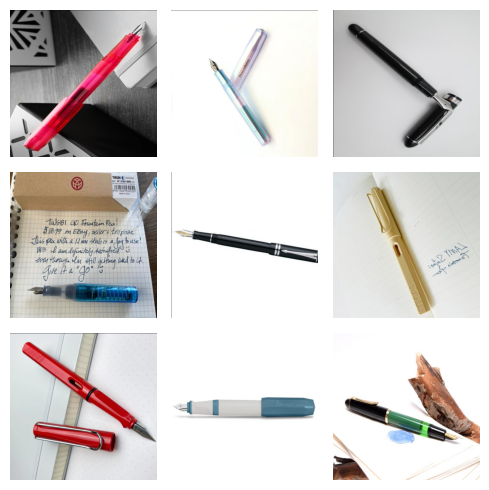

In [21]:
import matplotlib.pyplot as plt
import cv2
import os

# Specifying the path to the directory containing your images
dataset_path = dataset.location + '/train/images'

image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

num_rows = 3
num_cols = 3
total_images = min(num_rows * num_cols, len(image_files))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5))

for i in range(total_images):
    image_path = os.path.join(dataset_path, image_files[i])
    image = cv2.imread(image_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i // num_cols, i % num_cols].imshow(image)
        axes[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()
plt.show()


Here, we can see the images after they are annotated in Roboflow platform.

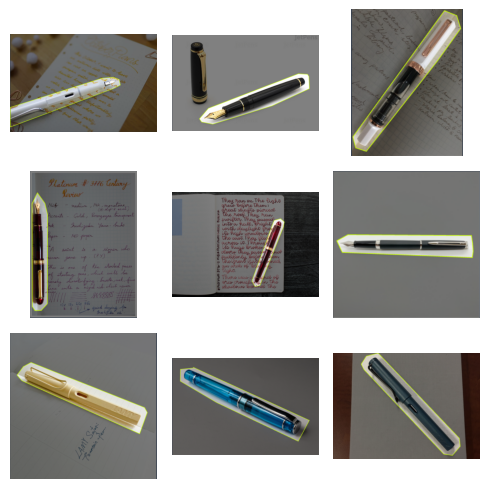

In [49]:
# Specifying the path to the directory containing your images
dataset_path = '/content/annotated'

image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

num_rows = 3
num_cols = 3
total_images = min(num_rows * num_cols, len(image_files))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5))

for i in range(total_images):
    image_path = os.path.join(dataset_path, image_files[i])
    image = cv2.imread(image_path)

    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i // num_cols, i % num_cols].imshow(image)
        axes[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()
plt.show()

##2. Training

In here, i began the training of the model. I reduce the number of epochs since i achieved the result that i want and it also takes a long time to complete each epoch. However, number of epochs can be increased to achieve better results.

In [23]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=2 imgsz=640

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/DND-Assingment-II-1/data.yaml, epochs=2, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset

In [24]:
!ls {HOME}/runs/detect/train2

args.yaml					     P_curve.png   val_batch0_labels.jpg
confusion_matrix.png				     PR_curve.png  val_batch0_pred.jpg
events.out.tfevents.1700407820.3f24512cc9d8.10063.0  R_curve.png   weights
F1_curve.png					     results.csv


After the training, i displayed the results of the training. These results include F1 curve, P curve, PR Curve and R curve. Results can be seen on the image below.

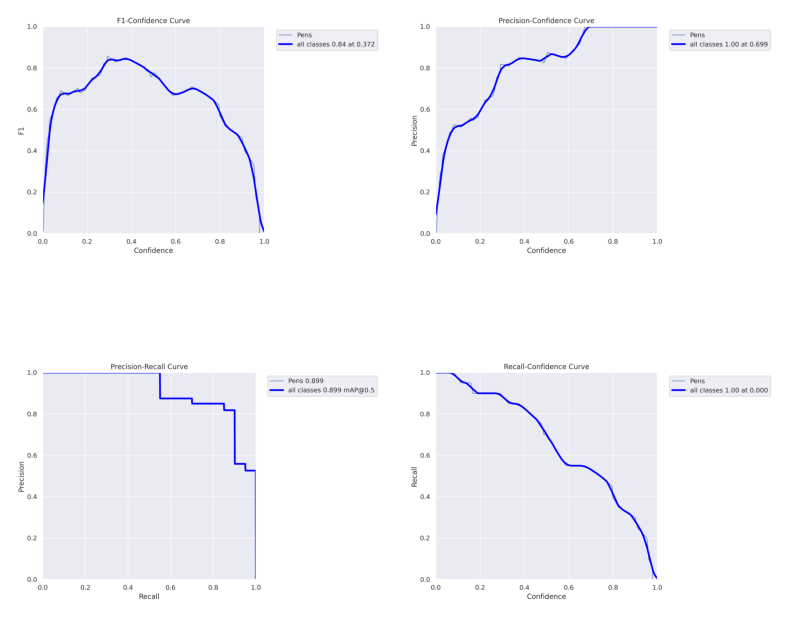

In [44]:


# List all files in the directory
image_paths = [
              HOME + '/runs/detect/train2/F1_curve.png',
               HOME + '/runs/detect/train2/P_curve.png',
               HOME + '/runs/detect/train2/PR_curve.png',
               HOME + '/runs/detect/train2/R_curve.png'
               ]

images = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is not None:
        images.append(image)
    else:
        print(f"Unable to load image from path: {image_path}")

# Display the images in a 2x2 grid
num_rows = 2
num_cols = 2

# Create a subplot for each image
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))

# Iterate over the images and display them in the grid
for i in range(min(num_rows * num_cols, len(images))):
    image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    axes[i // num_cols, i % num_cols].imshow(image)
    axes[i // num_cols, i % num_cols].axis('off')  # Turn off axis labels

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

## 3. Evaluation

Finally, i evaluate my dataset and display the results.

In [36]:
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt \data={dataset.location}/data.yaml

2023-11-19 16:25:04.890325: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-19 16:25:04.890459: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-19 16:25:04.890542: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-19 16:25:06.898869: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/DND-Assingment-II-1/valid/labels.cache... 20 images, 0 backgrounds, 0 c

I save my model and upload to Roboflow so i can check and improve it if it is needed.

In [37]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


Lastly, i wanted to see how well my model works. So i have included a picture that was not in dataset and calculated the results. As we can see, this image was not part of the dataset and when evaluated, it got identified as a pen with 0.81 confidence.

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 296.5, 'y': 287.0, 'width': 475.0, 'height': 432.0, 'confidence': 0.8192520141601562, 'class': 'Pens', 'class_id': 0, 'image_path': '/content/montblanc.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '570', 'height': '570'}}


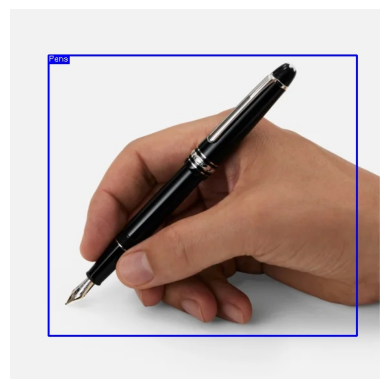

In [47]:

from roboflow import Roboflow
rf = Roboflow(api_key="8ZSkSBeAWfUI8WkQcdpp")
project = rf.workspace().project("dnd-assingment-ii")
model = project.version(1).model

print(model.predict("/content/montblanc.jpg", confidence=40, overlap=30).json())

model.predict("/content/montblanc.jpg", confidence=40, overlap=30).save("prediction.jpg")

image_path = '/content/prediction.jpg'
image = cv2.imread(image_path)

if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
else:
    print(f"Unable to load image from path: {image_path}")
